### Looking over extraction process for pdfs in order to retrieve all available information

__First we access the extraction-process and look at the data we have already looked at (without overwriting)__

In [227]:
from course_extractor import get_html, find_courses, get_pdfs
import os
import re
import numpy as np 

__The methods we have written so far have already done much of the job for us, we can use the already crawled htmls for each relative link and try to extract more of the meta-data available in the table found there:__

In [228]:
def get_data(folder):

    pattern = r'(?<=\>).*(?=\<)' # prior tested pattern: r'(?<=\>)[aA-zZ]+(?=\<)'
    for f in os.scandir(folder):
        
        #showing only one case for now
        if f.name == "Rena.txt":
            print(f) #double-checking that caught case is correct
            
            text = open(f).read()
            results = re.findall(pattern,text)
            data = []
            
            for r in results:
                if len(r)>0 and len(r)<50 and r.strip(" ") != "":
                    data.append(r)
            return f.name, data

### Expected data available in results:

![](expectedRena.PNG)

In [229]:
data = get_data("NOR-courses")
print(data)

<DirEntry 'Rena.txt'>
('Rena.txt', ['Homologations', 'Homologations', 'Filter', 'Discipline', 'All', 'Cross-Country', 'Ski Jumping', 'Alpine Skiing', 'Snowboard', 'Speed Skiing', 'Homologation number', 'Place', 'Nation', 'Level', 'All', 'WC', 'COC', 'Event', 'All', 'Downhill', 'Freeski Slopestyle', 'Giant Slalom', 'Indoor', 'Parallel', 'Parallel', 'Parallel Giant Slalom', 'Parallel Slalom', 'Slalom', 'Snowboard Cross', 'Speed Skiing', 'Super G', 'Category', 'All', 'A', 'B', 'C', 'D', 'E', 'Gender', 'All', 'Women', 'Men', 'search', 'Rena', 'Homologation#', 'Homologation #', 'Course', 'Course', 'Course data', 'Level', 'Length', 'Valid until', 'Inspector', 'Certifcate', 'Cert.', '<div class="clip">19/105.01/2.5</div>', '<div class="clip">NC 2.5 km</div>', '19/105.01/2.5', 'NC 2.5 km', 'Level', 'COC', 'Length', '2733', 'Valid until', '30.06.2024', 'Inspector', 'AALBERG, John (CAN)'])


- __From the output it can seem like the data we have available in near the end of the list corresponds to the middle part of the table. We can try splitting the output into more, and smaller lists, matching the expected columns.__
- __As for the data in the first column, we can see that the found lines of text have not been "trimmed" as would be expected, still showing the around-laying html code__

First attempt at splitting and understanding:

In [230]:
def minor_lists(l):
    
    first_col = []
    sec_col = []
    
    i = 0
    for e in l:
        if e == "Cert.": #assuming "Cert." is found i+2 before wanted data
            first_col = l[(i+3):(i+5)] #assuming we only have two elements of value to extract in this column
            
        elif e == "Level" and l[i+1] != "Length": #avoiding "too early" start to list  
            sec_col = l[i:] #assuming rest of found elements will all be in the second column
        i += 1
        
    return first_col, sec_col

Looking at what we got from extracting into smaller lists:

In [231]:
res = minor_lists(data[1])
res

(['19/105.01/2.5', 'NC 2.5 km'],
 ['Level',
  'COC',
  'Length',
  '2733',
  'Valid until',
  '30.06.2024',
  'Inspector',
  'AALBERG, John (CAN)'])

In [232]:
#Redefining first list with assumed labels for values (based on image)
first_list = [val for pair in zip(["Homoglation number (#)", "Course"], res[0]) for val in pair] 
first_list

['Homoglation number (#)', '19/105.01/2.5', 'Course', 'NC 2.5 km']

__Showing this in a "easier-to-understand" table:__

In [233]:
lst = first_list + res[1]


In [234]:
import pandas as pd

pd.DataFrame(lst)#,columns=['Homoglation number','Course','Level','Length','Valid until','Inspector'])
#fungerer ikke helt som ønsket

,0
0,Homoglation number (#)
1,19/105.01/2.5
2,Course
3,NC 2.5 km
4,Level
5,COC
6,Length
7,2733
8,Valid until
9,30.06.2024


In [235]:
pd.DataFrame(res) #fungerer ikke helt som ønsket

,0,1,2,3,4,5,6,7
0,19/105.01/2.5,NC 2.5 km,None,None,None,None,None,None
1,Level,COC,Length,2733,Valid until,30.06.2024,Inspector,"AALBERG, John (CAN)"


In [236]:
rows = [data[0]]
cols_standard = ["Destination"]

pairs = np.array(lst).reshape(-1, 2)

for p in pairs:
    cols_standard.append(p[0])
    rows.append(p[1])

df = pd.DataFrame([rows], columns = cols_standard).set_index('Destination')
df.index.name = None #making it a bit clearer by removing 

df

,Homoglation number (#),Course,Level,Length,Valid until,Inspector
Rena.txt,19/105.01/2.5,NC 2.5 km,COC,2733,30.06.2024,"AALBERG, John (CAN)"


### We seem to have gotten something that works here ^

Let's see if we get the same results when looking at more than one destination, and one with possibly more certificates

In [243]:
def get_data2(folder):
    all_data = []
    
    pattern = r'(?<=\>).*(?=\<)' # prior tested pattern: r'(?<=\>)[aA-zZ]+(?=\<)'
    for f in os.scandir(folder):
        
        text = open(f).read()
        results = re.findall(pattern,text)
        data = []
            
        for r in results:
            if len(r)>0 and len(r)<50 and r.strip(" ") != "":
                data.append(r)
        all_data.append([f.name, data])
        
    return all_data

In [244]:
data = get_data2("NOR-courses")
print(data)

[['Rena.txt', ['Homologations', 'Homologations', 'Filter', 'Discipline', 'All', 'Cross-Country', 'Ski Jumping', 'Alpine Skiing', 'Snowboard', 'Speed Skiing', 'Homologation number', 'Place', 'Nation', 'Level', 'All', 'WC', 'COC', 'Event', 'All', 'Downhill', 'Freeski Slopestyle', 'Giant Slalom', 'Indoor', 'Parallel', 'Parallel', 'Parallel Giant Slalom', 'Parallel Slalom', 'Slalom', 'Snowboard Cross', 'Speed Skiing', 'Super G', 'Category', 'All', 'A', 'B', 'C', 'D', 'E', 'Gender', 'All', 'Women', 'Men', 'search', 'Rena', 'Homologation#', 'Homologation #', 'Course', 'Course', 'Course data', 'Level', 'Length', 'Valid until', 'Inspector', 'Certifcate', 'Cert.', '<div class="clip">19/105.01/2.5</div>', '<div class="clip">NC 2.5 km</div>', '19/105.01/2.5', 'NC 2.5 km', 'Level', 'COC', 'Length', '2733', 'Valid until', '30.06.2024', 'Inspector', 'AALBERG, John (CAN)']], ['Natrudstilen%2C+Lillehammer.txt', ['Homologations', 'Homologations', 'Filter', 'Discipline', 'All', 'Cross-Country', 'Ski Jum

We will now have to to the same preprosessing with the found data of each re.findall(). To make things easier I will try to tweak the already existing minor_lists()

In [245]:
def minor_lists2(l):
    
    first_col = []
    sec_col = []
    
    i = 0
    for e in l:
        if e == "Cert.": #assuming "Cert." is found i+2 before wanted data
            first_col = l[(i+3):(i+5)] #assuming we only have two elements of value to extract in this column
            
        elif e == "Level" and l[i+1] != "Length": #avoiding "too early" start to list  
            sec_col = l[i:] #assuming rest of found elements will all be in the second column
        i += 1
    
    first = [val for pair in zip(["Homoglation number (#)", "Course"], first_col) for val in pair]
    
    return first + sec_col

In [246]:
for e in data:
    r = minor_lists2(e[1])
    print(e[0])
    print(r)

Rena.txt
['Homoglation number (#)', '19/105.01/2.5', 'Course', 'NC 2.5 km', 'Level', 'COC', 'Length', '2733', 'Valid until', '30.06.2024', 'Inspector', 'AALBERG, John (CAN)']
Natrudstilen%2C+Lillehammer.txt
['Homoglation number (#)', '19/122.01/1.1', 'Course', '1,144 m', 'Level', 'COC', 'Length', '5040', 'Valid until', '30.06.2024', 'Inspector', 'BJÖRKESTÖL, Hermod (NOR)']
Skaret%2C+Molde.txt
['Homoglation number (#)', '18/26.03/2.5', 'Course', '2.5 km south', 'Level', 'COC', 'Length', '1508', 'Valid until', '30.06.2023', 'Inspector', 'BJÖRKESTÖL, Hermod (NOR)']
Surnedal.txt
['Homoglation number (#)', '19/66.01/1.3', 'Course', '1.3 km', 'Level', 'COC', 'Length', '5243', 'Valid until', '30.06.2024', 'Inspector', 'BJÖRKESTÖL, Hermod (NOR)']
Konnerud%2C+Drammen.txt
['Homoglation number (#)', '20/46.01/1.5', 'Course', '1.5 km', 'Level', 'COC', 'Length', '5000', 'Valid until', '30.06.2020', 'Inspector', 'HORNTVEDT, Tom (NOR)']
Bodo.txt
['Homoglation number (#)', '20/51.01/1.2', 'Course', 'B

In [249]:
all_rows = []

for e in data:
    rows = [e[0]]
    r = minor_lists2(e[1])
    
    pairs = np.array(r).reshape(-1, 2)

    for p in pairs:
        rows.append(p[1])
    
    all_rows.append(rows)

df = pd.DataFrame(all_rows, columns = cols_standard).set_index('Destination')
df.index.name = None #making it a bit clearer by removing 

df

,Homoglation number (#),Course,Level,Length,Valid until,Inspector
Rena.txt,19/105.01/2.5,NC 2.5 km,COC,2733,30.06.2024,"AALBERG, John (CAN)"
Natrudstilen%2C+Lillehammer.txt,19/122.01/1.1,"1,144 m",COC,5040,30.06.2024,"BJÖRKESTÖL, Hermod (NOR)"
Skaret%2C+Molde.txt,18/26.03/2.5,2.5 km south,COC,1508,30.06.2023,"BJÖRKESTÖL, Hermod (NOR)"
Surnedal.txt,19/66.01/1.3,1.3 km,COC,5243,30.06.2024,"BJÖRKESTÖL, Hermod (NOR)"
Konnerud%2C+Drammen.txt,20/46.01/1.5,1.5 km,COC,5000,30.06.2020,"HORNTVEDT, Tom (NOR)"
Bodo.txt,20/51.01/1.2,Bestemorenga 1.2km sprint,COC,5210,30.06.2025,"BJÖRKESTÖL, Hermod (NOR)"
Steinkjer.txt,18/26.03/2.5,2.5 km south,COC,1508,30.06.2023,"BJÖRKESTÖL, Hermod (NOR)"
Tolga.txt,20/16.04/2.5,2.5 km,COC,1633,30.06.2025,"AALBERG, John (CAN)"
Henningvola.txt,19/51.01/1.0,1 km,COC,7500,30.06.2024,"BJÖRKESTÖL, Hermod (NOR)"
Roros.txt,19/105.01/2.5,NC 2.5 km,COC,2733,30.06.2024,"AALBERG, John (CAN)"


We now have a DataFrame, but can we actually trust the data? As of now I think we have not captured cases where:
- [ ] There is more than one certificate tied to the destination
- [ ] There is potential extra information in the table
 

We can check some of the cases by cross-referencing with the actual FIS homepage, the first destination with what seems to be an anomaly is Skaret%2C+Molde.txt. We have a look to see if the found data corresponds:

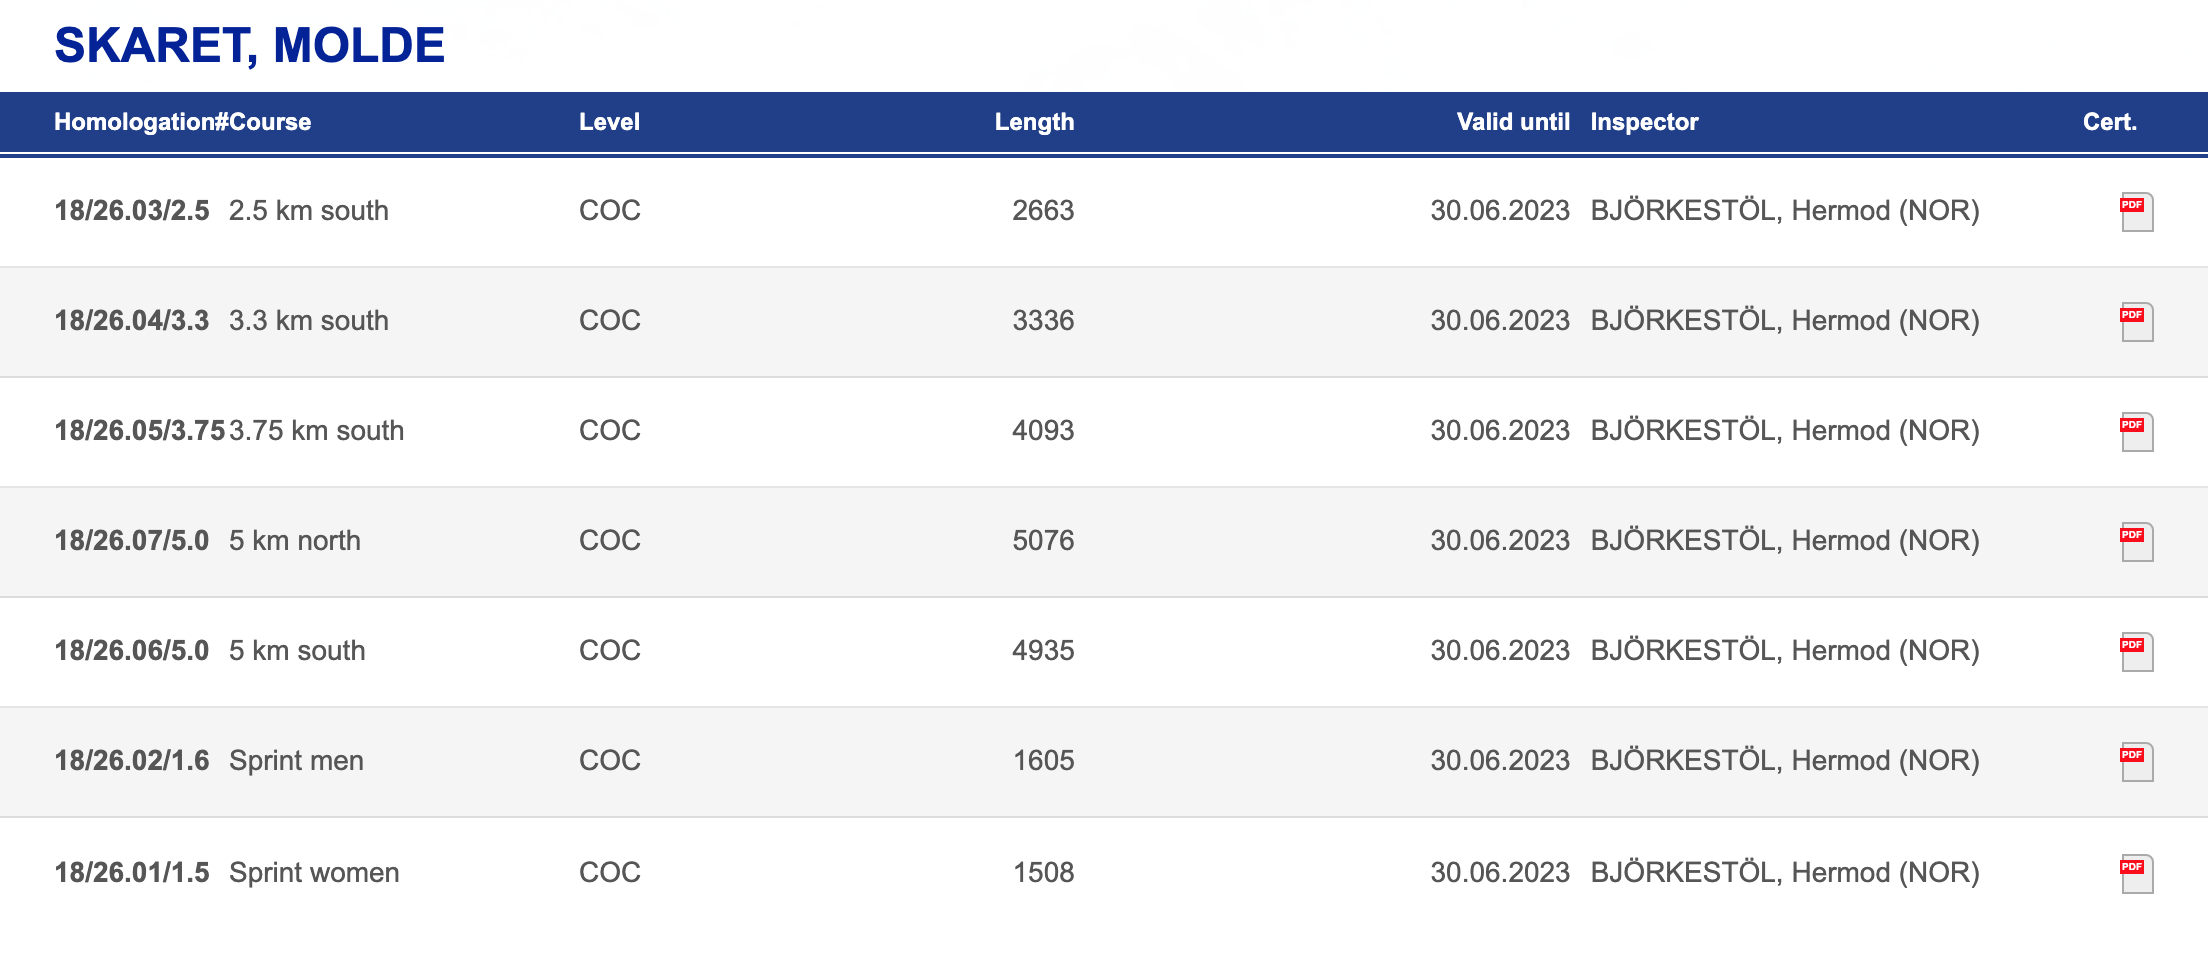

We see in the table that it's not the 'south'-anomaly that is our problem with the current dataframe, it's rather the fact that we don't find all the certificates (and their meta-data) for the destination. We can try to fix this by creating separate dataframes for each destination. For making this further step in the process easier to handle, we will work on solving it in a separate notebook ("dataframe-per-dest.ipynb")